# XG325: Explainable Artificial Intelligence
    
## Exercise 3

**Week 07 | Lecture 03**

_Saturday, April 13, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import tensorflow
import sklearn.linear_model
import sklearn.metrics
import sklearn.inspection

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

## Example: Feature Importance

In [2]:
# Load dataset
x1 = numpy.random.random(size=2001)
x2 = 0.1*numpy.random.random(size=2001)
x3 = numpy.random.random(size=2001)
xx = pandas.DataFrame.from_dict({'x1': x1, 'x2': x2, 'x3': x3})

y = x1**3 + x2
y += numpy.random.normal(0, 0.1, size=(2001,))

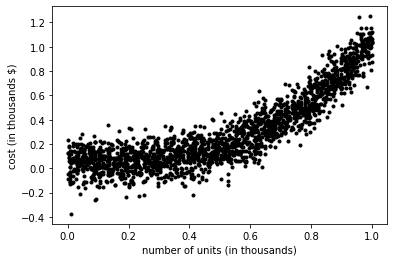

In [3]:
# Plot
plt.plot(x1, y, 'k.')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

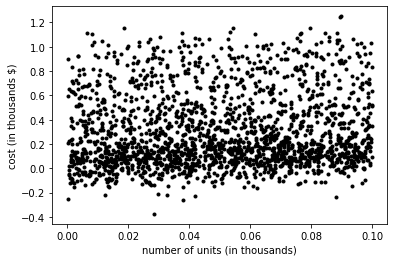

In [4]:
# Plot
plt.plot(x2, y, 'k.')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

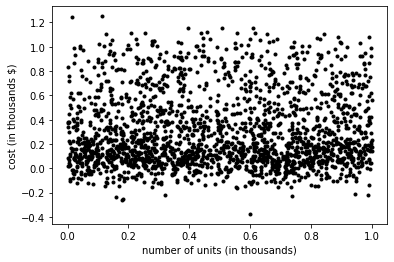

In [5]:
# Plot
plt.plot(x3, y, 'k.')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

In [6]:
train_x, val_x, train_y, val_y = sklearn.model_selection.train_test_split(xx, y, test_size=0.3)

In [7]:
# Fit
reg = sklearn.linear_model.LinearRegression()
reg.fit(train_x, train_y)

reg.intercept_, reg.coef_

(-0.1918561926518293, array([ 0.89565704,  1.01396278, -0.0149818 ]))

In [8]:
sklearn.metrics.mean_squared_error(reg.predict(val_x), val_y)

0.021394304905186474

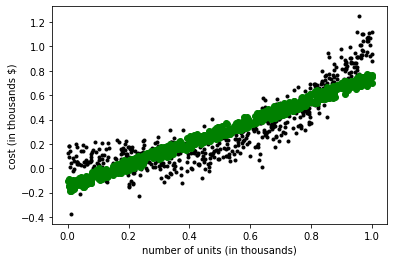

In [9]:
# Plot results
plt.plot(val_x.x1, val_y, 'k.')
plt.plot(val_x.x1, reg.predict(val_x), 'go')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

In [10]:
per = sklearn.inspection.permutation_importance(
    reg, val_x, val_y, n_repeats=30, random_state=0, scoring='neg_mean_absolute_error')

In [11]:
for i in per.importances_mean.argsort()[::-1]:
    print(f"{xx.columns[i]:<5}"
          f"{per.importances_mean[i]:.4f}"
          f" +/- {per.importances_std[i]:.4f}")

x1   0.2025 +/- 0.0085
x2   0.0021 +/- 0.0011
x3   0.0001 +/- 0.0002


## Exercisse

Repeat the same, but this time using neural networks.

In [12]:
"""Build model"""
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(3,)),
    tensorflow.keras.layers.Dense(256, activation='relu'),
    tensorflow.keras.layers.Dense(512, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='linear'),
])

model.compile(
    optimizer='Adam',
    loss=tensorflow.keras.losses.MeanSquaredError(),
    metrics=['mse', 'mae']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 256)               1024      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 133,121
Trainable params: 133,121
Non-trainable params: 0
_________________________________________________________________


In [13]:
"""Train"""
log = model.fit(train_x, train_y, epochs=8, validation_data=(val_x,  val_y))

Epoch 1/8
44/44 [==============================] - 1s 5ms/step - loss: 0.0369 - mse: 0.0369 - mae: 0.1486 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.1042
Epoch 2/8
44/44 [==============================] - 0s 3ms/step - loss: 0.0158 - mse: 0.0158 - mae: 0.0999 - val_loss: 0.0119 - val_mse: 0.0119 - val_mae: 0.0859
Epoch 3/8
44/44 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0888 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0937
Epoch 4/8
44/44 [==============================] - 0s 3ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0840 - val_loss: 0.0111 - val_mse: 0.0111 - val_mae: 0.0846
Epoch 5/8
44/44 [==============================] - 0s 3ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0833 - val_loss: 0.0121 - val_mse: 0.0121 - val_mae: 0.0866
Epoch 6/8
44/44 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0807 - val_loss: 0.0099 - val_mse: 0.0099 - val_mae: 0.0791
Epoch 7/8
44/44 [=================

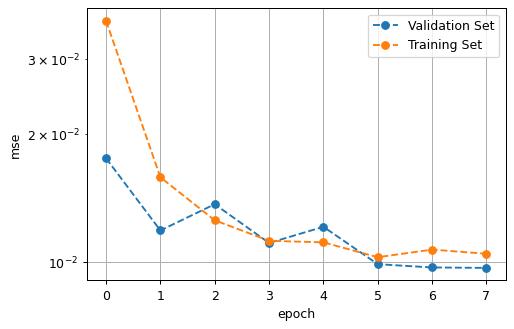

In [14]:
plt.figure(dpi=90)
plt.plot(log.history['val_mse'], 'o--', label='Validation Set')
plt.plot(numpy.array(log.history['mse']), 'o--', label='Training Set')

plt.ylabel('mse')
plt.xlabel('epoch')
plt.yscale("log")
plt.grid()

plt.legend()
plt.show()

In [15]:
"""Evaluate"""
model.evaluate(val_x,  val_y, verbose=2)

19/19 - 0s - loss: 0.0097 - mse: 0.0097 - mae: 0.0781 - 36ms/epoch - 2ms/step


[0.00968112237751484, 0.00968112237751484, 0.0781235545873642]

In [16]:
sklearn.metrics.mean_squared_error(model.predict(val_x), val_y)

0.009681123237238196

In [17]:
model.get_weights()

[array([[-0.09912054, -0.09783222,  0.01681283, ...,  0.08449694,
         -0.0817241 ,  0.12931292],
        [ 0.05323136, -0.06724498, -0.08232775, ...,  0.03844964,
         -0.13244076, -0.12374454],
        [ 0.1002712 ,  0.12283123, -0.06205757, ...,  0.08457007,
          0.03998863, -0.03746409]], dtype=float32),
 array([ 0.00569676,  0.02310181, -0.00951489, ..., -0.02381212,
        -0.01968604, -0.0363896 ], dtype=float32),
 array([[ 0.00391919, -0.0335845 ,  0.01250543, ..., -0.00360141,
          0.05777769, -0.00105555],
        [ 0.01334932, -0.06607296, -0.08876462, ...,  0.0079053 ,
          0.08688577, -0.04408297],
        [-0.00210907, -0.08006895,  0.02937254, ..., -0.02488826,
         -0.0946563 ,  0.04940633],
        ...,
        [ 0.00026008, -0.07207146, -0.07256421, ..., -0.08191499,
          0.05523992, -0.03515464],
        [ 0.01387971,  0.06801841,  0.01655209, ...,  0.04263883,
          0.07691889,  0.03207942],
        [-0.0260297 ,  0.02803154, -0.

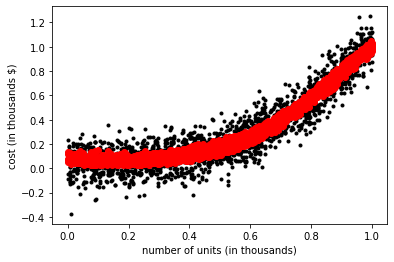

In [18]:
# Plot
plt.plot(x1, y, 'k.')
plt.plot(x1, model.predict(xx), 'ro')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

In [19]:
# here continue...